<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week12/2025/Lec12_kmeans_from_scratch_cleaned_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 K-Means Clustering from Scratch
This notebook walks through the K-Means Clustering algorithm implementation and visualization using a hands-on Python approach.

### 🧠 What is K-Means?
**K-Means** is an unsupervised learning algorithm used to partition data into *K* clusters by minimizing the **intra-cluster variance** (sum of squared distances to the cluster centroid).

### ✅ Basic Steps of K-Means:
1. Choose the number of clusters **K**.
2. Randomly initialize **K** cluster centroids.
3. Repeat until convergence:
   - Assign each point to the nearest centroid (cluster assignment).
   - Update centroids as the mean of points in each cluster.
4. Stop when centroids stabilize or maximum iterations are reached.


<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week7/Lec7_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from numpy.linalg import norm

In [2]:
iris = datasets.load_iris()
X = iris["data"]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
def calc_centroid(vector):
  centroid = np.sum(vector, axis = 0)/len(vector)
  return centroid

In [4]:
# initialize cluster ids and epochs
K = 2
epochs = 20
init_cluster_id = np.random.randint(1,K+1,len(X))
cluster_evolution = [init_cluster_id]


for epoch in range(epochs):
  distances = []
  centroids = []
  for cluster in range(1, K+1):
    # get cluster labels
    temp_cluster_id = np.where(init_cluster_id == cluster)

    # calculate centroid
    temp_centroid = calc_centroid(vector = X[temp_cluster_id])
    centroids.append(temp_centroid)

    # calculate distance for all data points from centroid
    temp_distances = norm((X - temp_centroid), axis =  1)
    distances.append(temp_distances)

  # revise cluster label comparing the distances of each data point from all centroids
  revised_cluster_ids = np.argmin(np.stack(distances), axis = 0) + 1
  cluster_evolution.append(revised_cluster_ids)
  init_cluster_id = revised_cluster_ids

  # stop when the clusters don't change in two consecutive iterations
  if all(cluster_evolution[epoch - 1] == cluster_evolution[epoch]):
    print(f"converged at epoch: {epoch}")
    last_epoch = epoch
    break




converged at epoch: 3


In [5]:
def get_plot_iteration(iter, K = 3):
  scatter_x = X[:, 1]
  scatter_y = X[:, 2]
  K = [i+1 for i in range(K)]
  cdict = {1: 'red', 2: 'blue', 3: 'green'}

  fig, ax = plt.subplots()
  for k in K:
      ix = np.where(cluster_evolution[iter] == k)
      ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[k], label = k)
  ax.legend()
  plt.show()

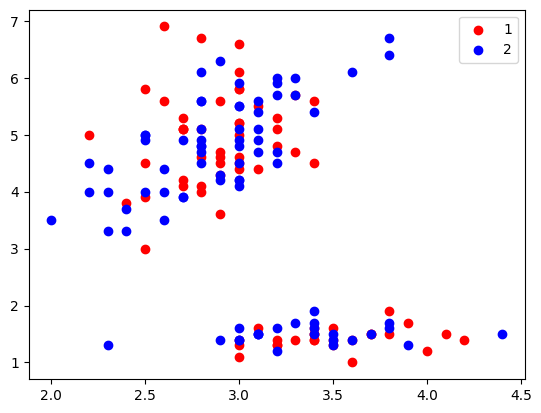

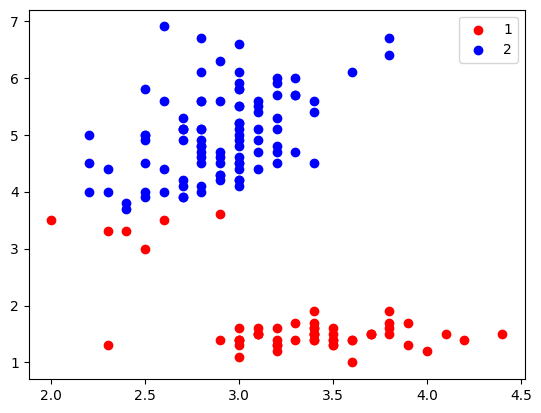

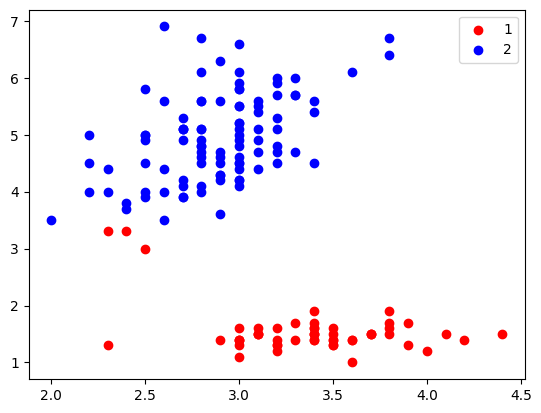

In [6]:
for i in range(last_epoch):
  get_plot_iteration(iter = i, K = 2)

#### Assignment: Calculate silhoutte score and the optimal number of clusters using the elbow method.